In [42]:
import requests as req
import json
import datetime
import pandas as pd
import matplotlib as plt
import plotly.express as px
import plotly.io as pio

resp = req.get('https://api.coingecko.com/api/v3/coins/harmony/market_chart/range?vs_currency=usd&from=1621620816&to=1621880016')

In [2]:
now = int(datetime.datetime.now().timestamp())

yesterday = int(datetime.datetime.now().timestamp()) - 86400

resp = req.get('https://api.coingecko.com/api/v3/coins/harmony/market_chart/range?vs_currency=usd&from=' + str(yesterday) + '&to=' + str(now))

In [3]:
data = json.loads(resp.text)

data

{'prices': [[1622060051796, 0.1066860526711999],
  [1622060399053, 0.10678829105810393],
  [1622060591564, 0.10684755660716991],
  [1622060961712, 0.10753272050715271],
  [1622061186958, 0.10749855251695142],
  [1622061410292, 0.10819550006625986],
  [1622061861196, 0.10859080242603919],
  [1622061995628, 0.10850832273782272],
  [1622062400267, 0.10870622549798839],
  [1622062715770, 0.10865813684904918],
  [1622063066592, 0.10896688852363978],
  [1622063375780, 0.10918827959973232],
  [1622063549845, 0.10965033041180734],
  [1622063892582, 0.1097743878287637],
  [1622064282112, 0.10927902685519476],
  [1622064548495, 0.1094451815972226],
  [1622064900776, 0.10923978291208583],
  [1622065213806, 0.10878770481988348],
  [1622065422463, 0.10854015166316101],
  [1622065728897, 0.10838211025002664],
  [1622065939621, 0.10894795429800021],
  [1622066406000, 0.10994310332478083],
  [1622066614838, 0.10991755356898653],
  [1622066805043, 0.10951265665574539],
  [1622067223924, 0.1100866939363

In [4]:
final = []

for i in data['prices']:
    
    temp = [datetime.datetime.fromtimestamp(int(i[0]/1000)), i[1]]
    
    final.append(temp)
        
final

[[datetime.datetime(2021, 5, 26, 16, 14, 11), 0.1066860526711999],
 [datetime.datetime(2021, 5, 26, 16, 19, 59), 0.10678829105810393],
 [datetime.datetime(2021, 5, 26, 16, 23, 11), 0.10684755660716991],
 [datetime.datetime(2021, 5, 26, 16, 29, 21), 0.10753272050715271],
 [datetime.datetime(2021, 5, 26, 16, 33, 6), 0.10749855251695142],
 [datetime.datetime(2021, 5, 26, 16, 36, 50), 0.10819550006625986],
 [datetime.datetime(2021, 5, 26, 16, 44, 21), 0.10859080242603919],
 [datetime.datetime(2021, 5, 26, 16, 46, 35), 0.10850832273782272],
 [datetime.datetime(2021, 5, 26, 16, 53, 20), 0.10870622549798839],
 [datetime.datetime(2021, 5, 26, 16, 58, 35), 0.10865813684904918],
 [datetime.datetime(2021, 5, 26, 17, 4, 26), 0.10896688852363978],
 [datetime.datetime(2021, 5, 26, 17, 9, 35), 0.10918827959973232],
 [datetime.datetime(2021, 5, 26, 17, 12, 29), 0.10965033041180734],
 [datetime.datetime(2021, 5, 26, 17, 18, 12), 0.1097743878287637],
 [datetime.datetime(2021, 5, 26, 17, 24, 42), 0.10927

In [5]:
total_df = pd.DataFrame(final, columns=['date', 'price'])

total_df = total_df.set_index('date')

total_df

,price
date,
2021-05-26 16:14:11,0.106686
2021-05-26 16:19:59,0.106788
2021-05-26 16:23:11,0.106848
2021-05-26 16:29:21,0.107533
2021-05-26 16:33:06,0.107499
...,...
2021-05-27 15:46:46,0.105151
2021-05-27 15:53:56,0.105015
2021-05-27 15:58:59,0.105307


<AxesSubplot:title={'center':'Price of Harmony One in US Dollars'}>

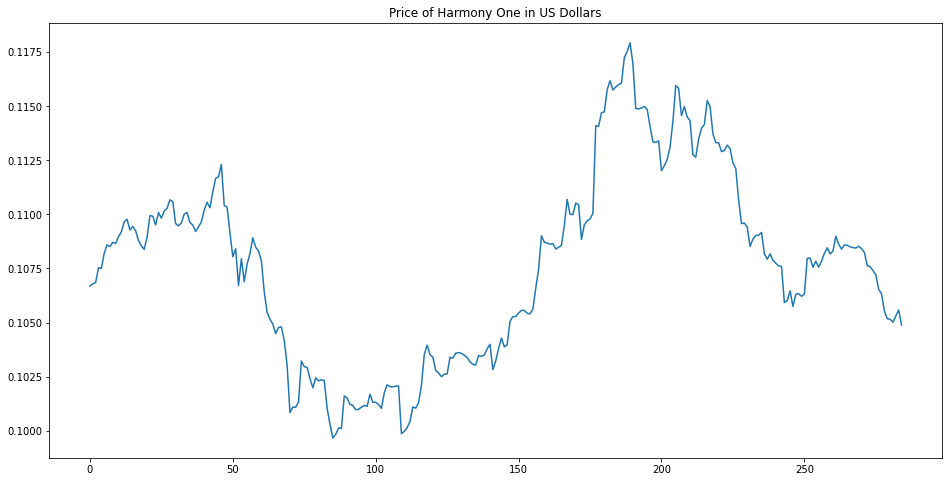

In [32]:
total_df['price'].plot(label='ONE', figsize=[16,8], title="Price of Harmony One in US Dollars")


In [45]:
total_df = pd.DataFrame(final, columns=['date', 'price'])

fig = px.line(total_df, x='date', y='price', title='24 hour price chart for Harmony One')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1hr", step="hour", stepmode="backward"),
            dict(count=6, label="6hr", step="hour", stepmode="backward"),
            dict(count=12, label="12hr", step="hour", stepmode="backward"),
            dict(count=24, label="24hr", step="hour", stepmode="backward"),
        ])
    )
)

pio.write_html(fig, file='24_hour_chart', auto_open=False)

fig.show()

<AxesSubplot:title={'center':'Harmony One 24 hour price chart with hourly moving average'}>

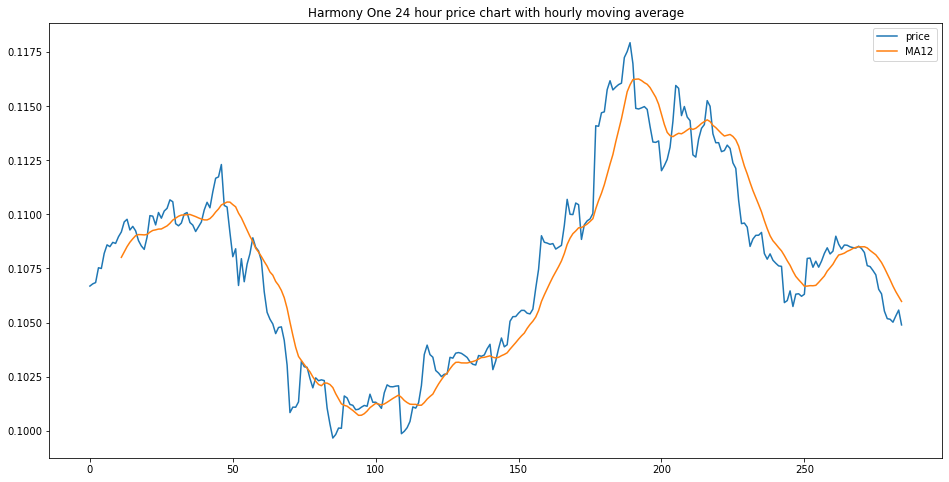

In [40]:
total_df['MA12'] = total_df['price'].rolling(12).mean()

total_df[['price', 'MA12']].plot(figsize=(16, 8), title='Harmony One 24 hour price chart with hourly moving average')